In [33]:
import pointCollection as pc
import h5py
import re
import matplotlib.pyplot as plt
import numpy as np
import glob
%matplotlib notebook

### Tile locations, etc

Digested data are in tiled files in /Volumes/ice3/ben/OIB_fits/AA_aug_merged/centers

In [6]:
! ls /Volumes/ice3/ben/OIB_fits/AA_aug_merged/centers | head

E0_N-1000.h5
E0_N1000.h5
E0_N-1040.h5
E0_N1040.h5
E0_N-1080.h5
E0_N1080.h5
E0_N-1120.h5
E0_N1120.h5
E0_N-1160.h5
E0_N1160.h5
ls: write error: Broken pipe


The components of the filename give the location of each tile in kilometers, EPSG:3031.

<IPython.core.display.Javascript object>


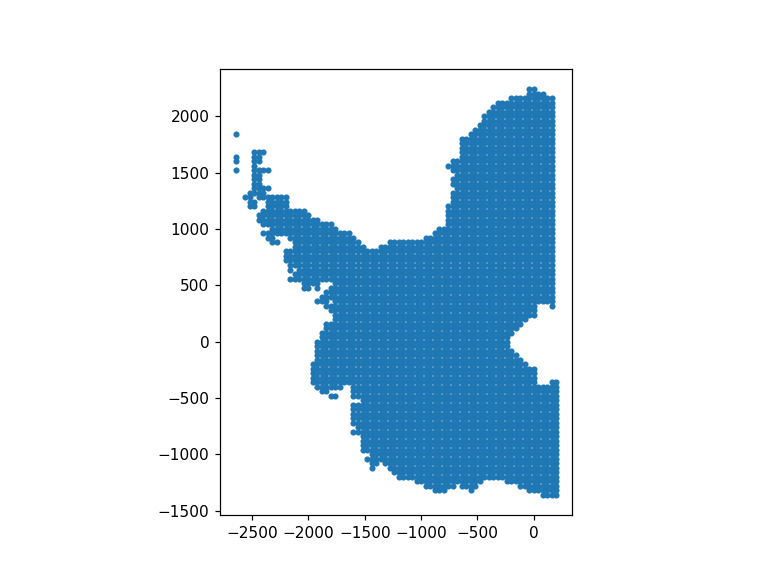

In [35]:
tile_re=re.compile('E(.*)_N(.*).h5')
xy_tiles=np.c_[[[*map(float, tile_re.search(file).groups())] for file in glob.glob('/Volumes/ice3/ben/OIB_fits/AA_aug_merged/centers/E*.h5')]]

plt.figure(); plt.plot(xy_tiles[:,0], xy_tiles[:,1],'.')
plt.gca().set_aspect(1)


Each of these contains a 'data' group and a 'meta' group:

In [36]:
that_file="/Volumes/ice3/ben/OIB_fits/AA_aug_merged/centers/E-2080_N920.h5"
! h5ls {that_file}; echo  "--"; h5ls {that_file}/data; echo "--"; h5ls {that_file}/meta

E_RMS                    Group
RMS                      Group
bias                     Group
data                     Group
dz                       Group
dzdt_lag1                Group
dzdt_lag2                Group
dzdt_lag4                Group
meta                     Group
slope_bias               Group
z0                       Group
--
bias_ID                  Dataset {189934}
cycle                    Dataset {189934}
day                      Dataset {189934}
h_firn                   Dataset {189934}
rgt                      Dataset {189934}
sensor                   Dataset {189934}
sigma                    Dataset {189934}
sigma_corr               Dataset {189934}
sigma_extra              Dataset {189934}
slope_mag                Dataset {189934}
three_sigma_edit         Dataset {189934}
tide_ocean               Dataset {189934}
time                     Dataset {189934}
time_corr                Dataset {189934}
x                        Dataset {189934}
y                        D

You can read the 'data' group however you like.  A pre-programmed way to do it that I like is my pointCollection library:

In [37]:
D=pc.data().from_h5(that_file,  field_dict={'data':['x','y','z','tide_ocean', 'sensor', 'time']})
D

<class 'pointCollection.data.data'> with shape (189934,),
with fields:
['x', 'y', 'z', 'tide_ocean', 'sensor', 'time']

The sensor from which each dataset came can be decoded using the 'sensor' field and the attributes of the 'meta/sensors' group

In [38]:
with h5py.File(that_file,'r') as h5f:
    print(dict(h5f['/meta/sensors'].attrs))

{'sensor_1': 'ICESat1', 'sensor_10': 'WV01_20161207_10200100564D6900_1020010056AABE00_seg1_32m_dem_filt.tif', 'sensor_11': 'WV01_20161117_10200100599D4700_102001005785AA00_seg1_32m_dem_filt.tif', 'sensor_12': 'WV02_20161125_10300100601F5800_1030010060C0B100_seg2_32m_dem_filt.tif', 'sensor_13': 'WV03_20161208_10400100264E4F00_10400100260B1A00_seg1_32m_dem_filt.tif', 'sensor_14': 'WV02_20161125_10300100601F5800_1030010060C0B100_seg1_32m_dem_filt.tif', 'sensor_15': 'WV01_20160926_1020010055E7A700_102001005761B400_seg3_32m_dem_filt.tif', 'sensor_16': 'WV03_20160831_1040010020BAB200_104001002195D600_seg1_32m_dem_filt.tif', 'sensor_17': 'WV03_20161026_1040010024164900_10400100240D9C00_seg3_32m_dem_filt.tif', 'sensor_18': 'WV01_20170306_102001005D340B00_102001005D2CC500_seg1_32m_dem_filt.tif', 'sensor_19': 'WV02_20170205_1030010063156700_10300100647F6200_seg1_32m_dem_filt.tif', 'sensor_2': 'ICESat2', 'sensor_20': 'WV03_20170304_10400100297A2400_104001002995DB00_seg1_32m_dem_filt.tif', 'sensor

In [44]:
# slightly more readable:
sensor_num=0
with h5py.File(that_file,'r') as h5f:
    while sensor_num < 10000:
        sensor_num += 1
        try:
            print(f"sensor {sensor_num}: {h5f['/meta/sensors'].attrs['sensor_'+str(sensor_num)]}")
        except Exception:
            break

sensor 1: ICESat1
sensor 2: ICESat2
sensor 3: ATM
sensor 4: LVIS
sensor 5: riegl
sensor 6: WV01_20140926_10200100336E1400_10200100331FBC00_seg1_32m_dem_filt.tif
sensor 7: WV01_20141123_1020010036625300_102001003936BE00_seg1_32m_dem_filt.tif
sensor 8: WV01_20141124_1020010037652A00_102001003666D400_seg1_32m_dem_filt.tif
sensor 9: WV02_20160107_103001004F044700_103001005030EA00_seg1_32m_dem_filt.tif
sensor 10: WV01_20161207_10200100564D6900_1020010056AABE00_seg1_32m_dem_filt.tif
sensor 11: WV01_20161117_10200100599D4700_102001005785AA00_seg1_32m_dem_filt.tif
sensor 12: WV02_20161125_10300100601F5800_1030010060C0B100_seg2_32m_dem_filt.tif
sensor 13: WV03_20161208_10400100264E4F00_10400100260B1A00_seg1_32m_dem_filt.tif
sensor 14: WV02_20161125_10300100601F5800_1030010060C0B100_seg1_32m_dem_filt.tif
sensor 15: WV01_20160926_1020010055E7A700_102001005761B400_seg3_32m_dem_filt.tif
sensor 16: WV03_20160831_1040010020BAB200_104001002195D600_seg1_32m_dem_filt.tif
sensor 17: WV03_20161026_1040010

The first five sensors are laser altimeters, the remainder are WorldView DEMs

## Firn corrections

Tyler has put together a library of firn corrections in his PySMB library.  My interface to his library is below, based on a pointCollection data object holding the data

The variables I used most recently are:
    
    firn_directory=/Volumes/ice3/ben/FDM
    
    firn_model=MERRA2_hybrid
    
    firn_version=v1.2
     


In [ ]:
def assign_firn_variable(data, firn_correction, firn_dir, hemisphere,\
                         model_version='1.0', subset_valid=False, 
                         variables=None, infer_FAC=True, rho_water=1):

    EPSG={-1:'EPSG:3031', 1:'EPSG:3413'}[hemisphere]
    
    if firn_correction == 'MAR':
        if hemisphere==1:
            data.assign({'h_firn' : SMBcorr.interp_MAR_firn(data.x, data.y, data.time)})
    elif firn_correction == 'MERRA2_hybrid':
        KWARGS={}
        # get MERRA-2 version and major version
        MERRA2_VERSION = model_version
        # MERRA-2 hybrid directory
        DIRECTORY=os.path.join(firn_dir,'MERRA2_hybrid',MERRA2_VERSION)
        # MERRA-2 region name from ATL11 region
        MERRA2_REGION = {-1:'ais',1:'gris'}[hemisphere]
        # keyword arguments for MERRA-2 interpolation programs
        if MERRA2_VERSION in ('v0','v1','v1.0'):
            KWARGS['VERSION'] = MERRA2_VERSION
            DEFAULT_VARIABLES = {'FAC':'FAC', 'SMB_a':'cum_smb_anomaly', 'h_a':'height'}
        else:
            KWARGS['VERSION'] = MERRA2_VERSION.replace('.','_')
            DEFAULT_VARIABLES = {'FAC':'FAC', 'SMB_a':'SMB_a','h_a':'h_a'}
        # use compressed files
        if hemisphere==1:
            KWARGS['GZIP'] = True
        else:
            KWARGS['GZIP'] = False
        if variables is None:
            VARIABLES = DEFAULT_VARIABLES
        else:
            VARIABLES=variables
        # output variable keys for both direct and derived fields
        SMB_data={out_var: SMBcorr.interpolate_merra_hybrid(DIRECTORY, EPSG,
                            MERRA2_REGION, data.time, data.x, data.y,
                            VARIABLE=model_var, **KWARGS) for out_var, model_var in VARIABLES.items()}
        if infer_FAC:
            SMB_data['FAC']=SMB_data['h_a']-SMB_data['SMB_a']
        if 'floating' in data.fields:
            # assume SMB is in ice equivalent.  
            #  For grounded ice, dh = FAC + SMB
            #  For floating ice, dh = FAC + (rho_water-rho_i)/(rho_w) SMB
            float_scale = (data.floating==0) + (rho_water-.917)/rho_water*(data.floating==1)
            data.assign({'h_firn':SMB_data['FAC'] + float_scale*SMB_data['SMB_a']})
        else:
            data.assign({'h_firn':SMB_data['FAC'] + SMB_data['SMB_a']})

    if subset_valid:
        data.index(np.isfinite(data.h_firn))
